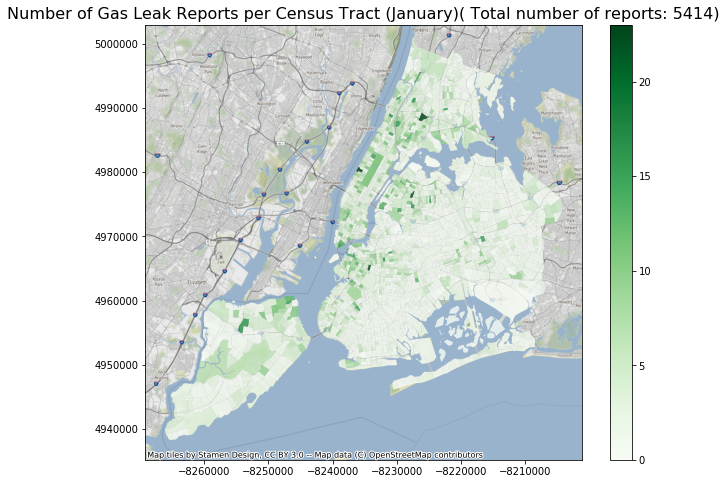

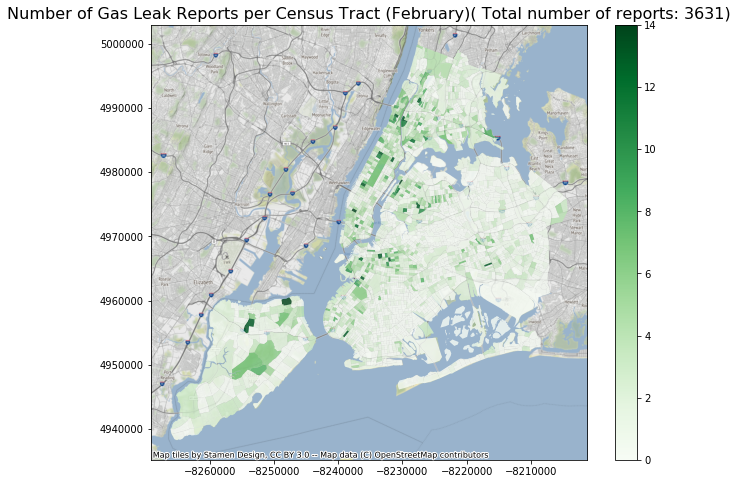

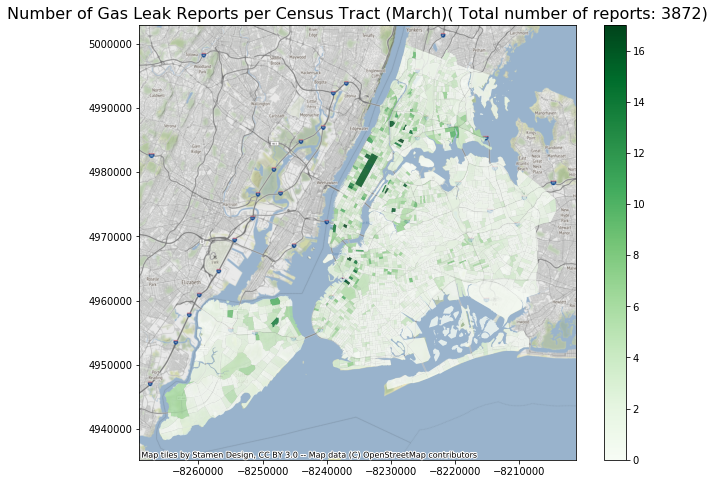

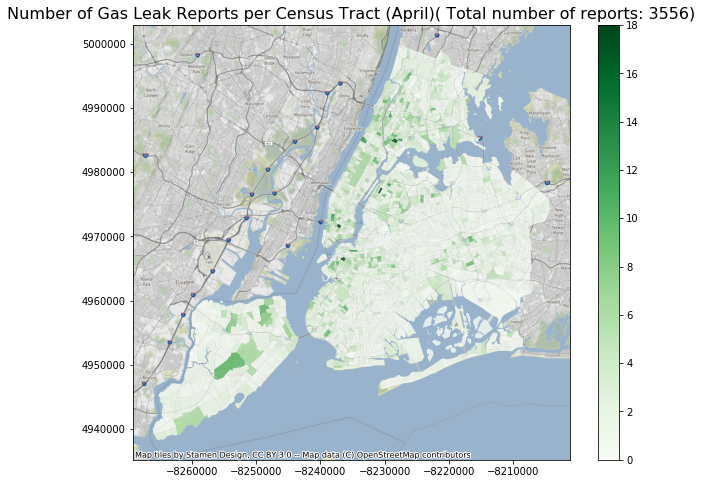

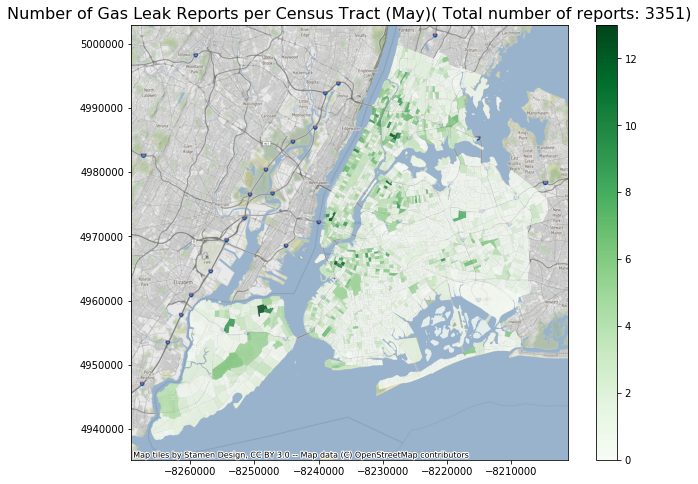

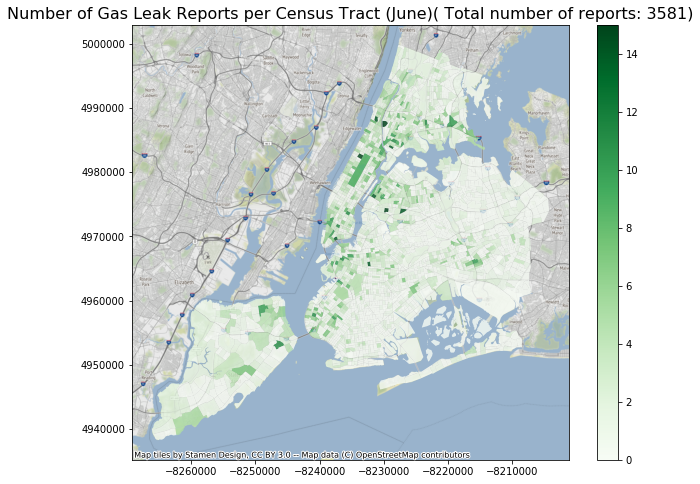

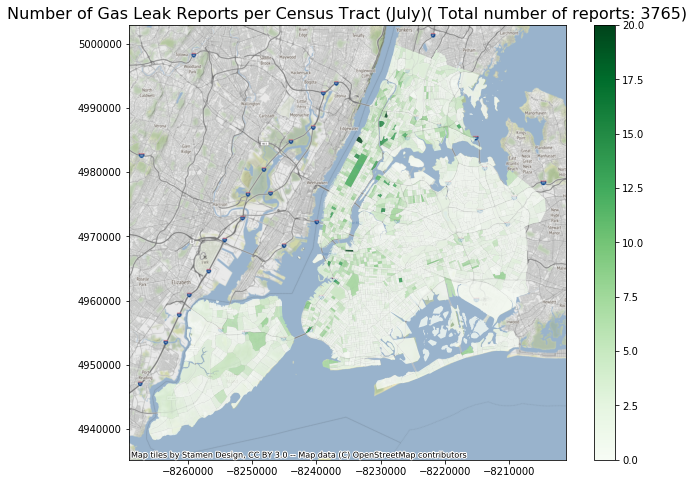

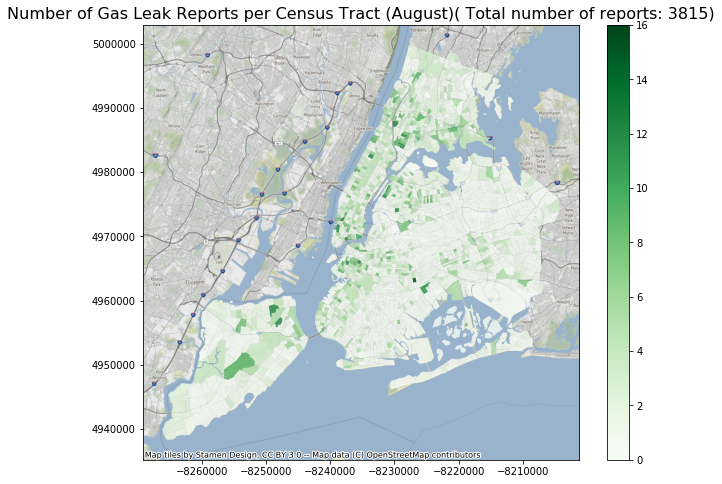

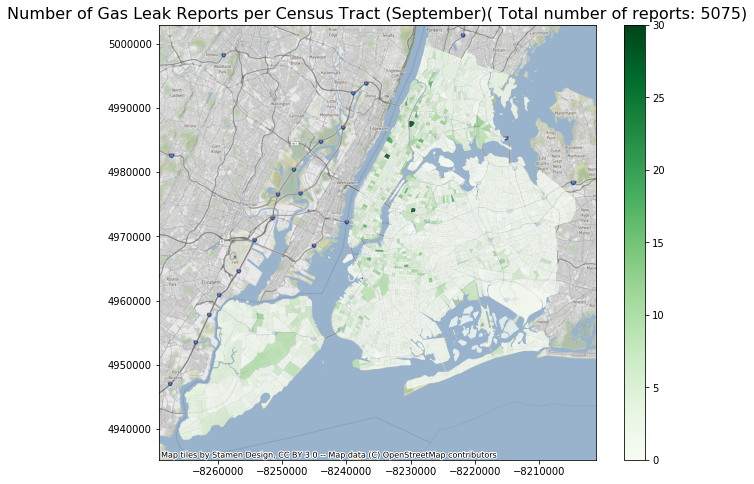

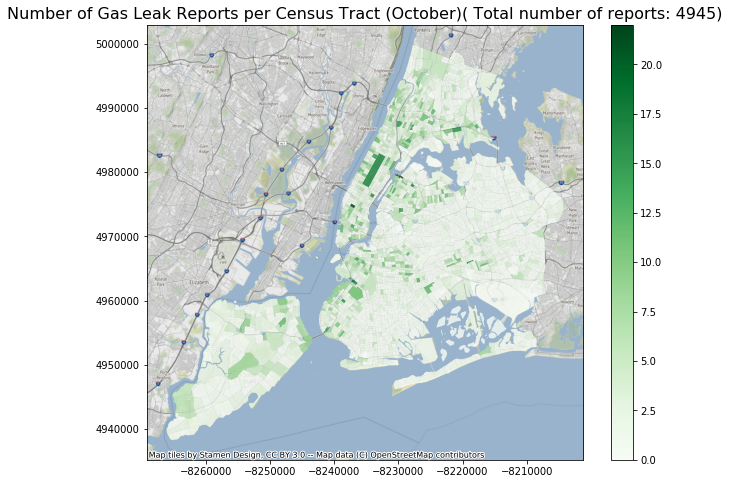

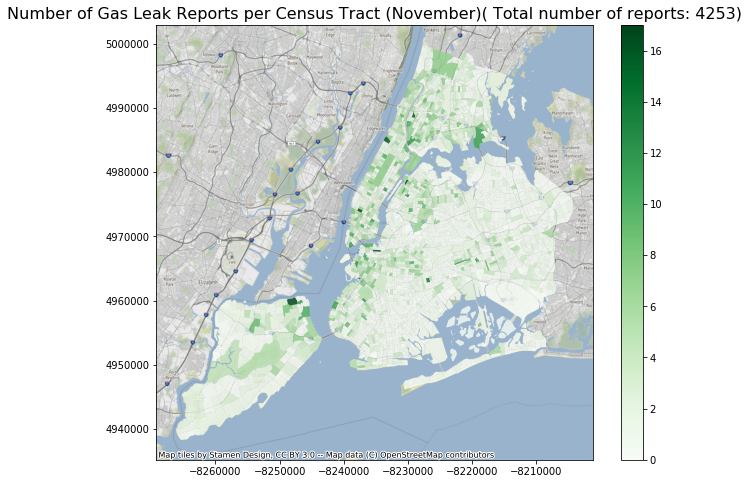

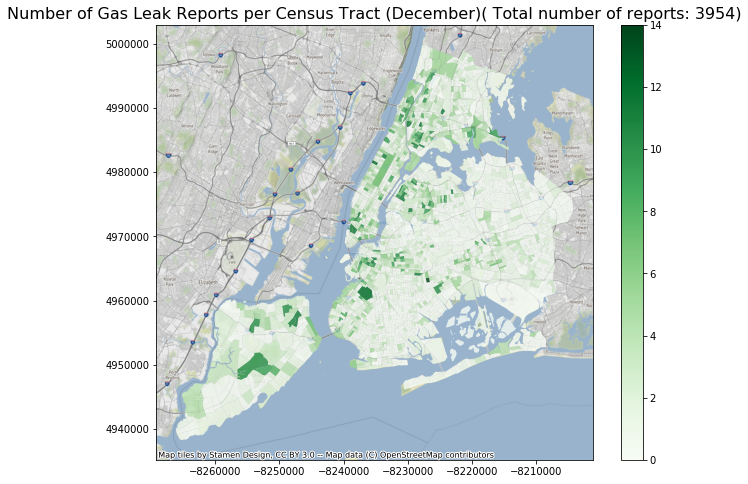

In [2]:
import os
import descartes
import pandas as pd
import geopandas as gpd
import platform
import matplotlib.pyplot as plt
import contextily as ctx


#shp_file = 'tl_2019_36_tract/tl_2019_36_tract.shp'
shp_file = 'nyu_2451_34505/nyu_2451_34505.shp'
#shp_file = 'NYC_Census_Tracts_for_2010_US_Census/NYC_Census_Tracts_for_2010_US_Census.shp'
us_tract = gpd.read_file(shp_file)
#us_tract.plot()
#plt.show()
#print(list(us_tract))
data = pd.read_csv('CT_Monthly_Count2018.csv')

Month = ['01','02','03','04','05','06','07','08','09','10','11','12']
Month_word = ['January','February','March','April','May','June','July','August','September','October','November','December']
for i in range(0,12):
    Month_data = pd.DataFrame(columns = ['Time','CensusTract','NumberOfReports']) # create a new Dataframe with each month
    for row in range(0,len(data)):
        if data.iat[row,0][0:2] == Month[i]:    
            Month_data = Month_data.append({'Time' : data.iat[row,0], 'CensusTract' : data.iat[row,1],  'NumberOfReports': data.iat[row,2] } , ignore_index=True)

    us_tract['CensusTract'] = us_tract['name'].str.upper()              # create a new column of the same name as DF from 'NAME'
                                                                        # In shp file, the "NAME" is the census tract
    us_tract['CensusTract'] = us_tract.CensusTract.astype(float)        # Conver type to float so we can merge the DFs
                                                                     # We use merge to pass in the data(NumOfReports)from the csv
    Month_data['NumberOfReports'] = Month_data.NumberOfReports.astype(int)
    #join = us_tract.merge(Month_data, on='CensusTract')

    us_tract['NumberOfReports'] = 0
    
    for row in range(0,len(us_tract)):
        ind = Month_data.loc[Month_data['CensusTract'] == us_tract['CensusTract'][row]].index
        if len(ind) is not 0:
            us_tract.at[row,'NumberOfReports'] = Month_data['NumberOfReports'][ind[0]]
    Total = us_tract['NumberOfReports'].sum()

    #map = us_tract.plot(column='NumberOfReports',cmap='Greens',figsize = (10,8),alpha = 0.8,legend = True)#edgecolor = 'k'
    #leg = map.get_legend()
    #leg.set_title('Number Of Gas Leak Reports')
    #leg.set_bbox_to_anchor((1.1,0.5,0.1,0.5))                          # Adjusted numbers to find the best location and size of the legend
    #%%
    #plot with background map
    df = us_tract.to_crs(epsg=3857) 
    ax = df.plot(column='NumberOfReports',cmap='Greens',figsize = (10,8),alpha = 0.8, legend = True)
    ax.set_title(label = 'Number of Gas Leak Reports per Census Tract (' + Month_word[i] + ')' + '( Total number of reports: '+ str(Total)+')', fontdict={'fontsize': 16}, loc='center')
    ctx.add_basemap(ax,zoom = 12)
